<a href="https://colab.research.google.com/github/HIJADI/Data-Science-Portfolio/blob/main/project3_SQL_Chinook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 3: SQL


## Chinook data set

SQLite3 using the Chinook dataset.  Set up the software, database, and tables, and ancillary information.


### Come up with questions about your data
Have a look at the Entity-Relation ( ER ) diagram to help come up with questions.

* What sort of information is in this dataset?
* How many records are there?
* How many different countries (states, counties, cities, etc) have records in this data set?


If you are stuck, here are some ideas for questions:
- https://github.com/LucasMcL/15-sql_queries_02-chinook/blob/master/README.md
- [Using the R language]( https://rpubs.com/enext777/636199 )
- [Search Google]( https://www.google.com/search?q=chinook+database+questions )



In [1]:
# Install the sqlite package for Ubuntu
# Download the Chinook sqlite database
import sqlite3 as db
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread


In [2]:
%%capture
%%bash
apt-get update
apt-get install -y sqlite3


In [3]:
!sqlite3 --help


Usage: sqlite3 [OPTIONS] FILENAME [SQL]
FILENAME is the name of an SQLite database. A new database is created
if the file does not previously exist.
OPTIONS include:
   -A ARGS...           run ".archive ARGS" and exit
   -append              append the database to the end of the file
   -ascii               set output mode to 'ascii'
   -bail                stop after hitting an error
   -batch               force batch I/O
   -box                 set output mode to 'box'
   -column              set output mode to 'column'
   -cmd COMMAND         run "COMMAND" before reading stdin
   -csv                 set output mode to 'csv'
   -deserialize         open the database using sqlite3_deserialize()
   -echo                print commands before execution
   -init FILENAME       read/process named file
   -[no]header          turn headers on or off
   -help                show this message
   -html                set output mode to HTML
   -interactive         force interactive I/O
   -j

In [4]:
!sqlite3 --version


3.37.2 2022-01-06 13:25:41 872ba256cbf61d9290b571c0e6d82a20c224ca3ad82971edc46b29818d5dalt1


In [5]:
%%bash
[ -f chinook.zip ] ||
  curl -s -O https://www.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip
unzip -l chinook.zip


Archive:  chinook.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
   884736  2015-11-29 10:53   chinook.db
---------                     -------
   884736                     1 file


In [6]:
!rm -f chinook.db
!unzip -u chinook.zip


Archive:  chinook.zip
  inflating: chinook.db              


In [7]:
!ls -la


total 1464
drwxr-xr-x 1 root root   4096 Oct 24 21:27 .
drwxr-xr-x 1 root root   4096 Oct 24 20:45 ..
-rw-r--r-- 1 root root 884736 Nov 29  2015 chinook.db
-rw-r--r-- 1 root root 305596 Oct 24 20:47 chinook.zip
drwxr-xr-x 4 root root   4096 Oct 23 13:40 .config
-rw-r--r-- 1 root root   2845 Oct 24 20:47 erd.er
-rw-r--r-- 1 root root 283846 Oct 24 20:47 erd.png
drwxr-xr-x 1 root root   4096 Oct 23 13:40 sample_data


In [8]:
# Connect to a sqlite database and load a result set into a data frame
db_con = db.connect("chinook.db")

###  Get number of records in all tables

In [9]:
# Get numer of records in all tables

!echo "SELECT 'SELECT count(1), \"' || name || '\" FROM ' || name || ';'  FROM sqlite_master WHERE type = 'table';" | \
sqlite3 -readonly chinook.db | sqlite3 -readonly chinook.db | sort -k1nr -t'|' -

8715|playlist_track
3503|tracks
2240|invoice_items
412|invoices
347|albums
275|artists
59|customers
25|genres
18|playlists
15|sqlite_stat1
10|sqlite_sequence
8|employees
5|media_types


### Generate ERD diagram of the database

In [10]:
# use the eralchemy package to automatically generate the erd
!pip install eralchemy


In [11]:
# Draw from a SQLite database file
from eralchemy import render_er
render_er("sqlite:///chinook.db", "erd.png")
render_er("sqlite:///chinook.db", "erd.er", mode='er')
!ls -al erd.*


-rw-r--r-- 1 root root   2845 Oct 24 21:27 erd.er
-rw-r--r-- 1 root root 283846 Oct 24 21:27 erd.png


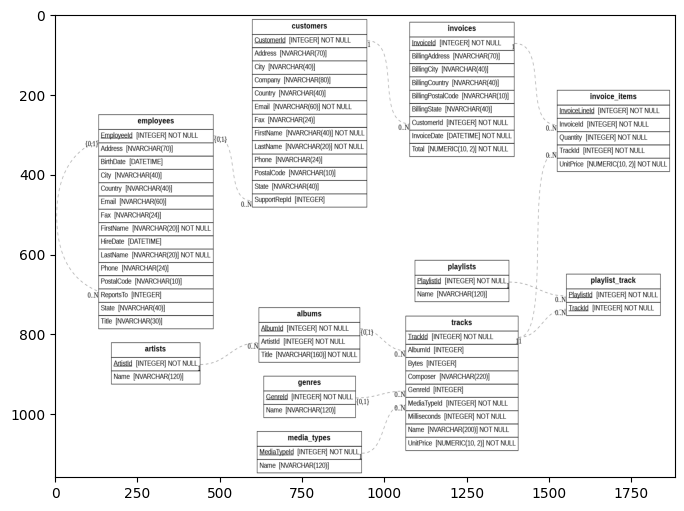

In [12]:
img = imread('erd.png')
fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(img, aspect='auto', zorder=0)


In [13]:
!cat erd.er

[albums]
    *AlbumId {label:"INTEGER"}
    ArtistId {label:"INTEGER"}
    Title {label:"NVARCHAR(160)"}
[artists]
    *ArtistId {label:"INTEGER"}
    Name {label:"NVARCHAR(120)"}
[customers]
    *CustomerId {label:"INTEGER"}
    Address {label:"NVARCHAR(70)"}
    City {label:"NVARCHAR(40)"}
    Company {label:"NVARCHAR(80)"}
    Country {label:"NVARCHAR(40)"}
    Email {label:"NVARCHAR(60)"}
    Fax {label:"NVARCHAR(24)"}
    FirstName {label:"NVARCHAR(40)"}
    LastName {label:"NVARCHAR(20)"}
    Phone {label:"NVARCHAR(24)"}
    PostalCode {label:"NVARCHAR(10)"}
    State {label:"NVARCHAR(40)"}
    SupportRepId {label:"INTEGER"}
[employees]
    *EmployeeId {label:"INTEGER"}
    Address {label:"NVARCHAR(70)"}
    BirthDate {label:"DATETIME"}
    City {label:"NVARCHAR(40)"}
    Country {label:"NVARCHAR(40)"}
    Email {label:"NVARCHAR(60)"}
    Fax {label:"NVARCHAR(24)"}
    FirstName {label:"NVARCHAR(20)"}
    HireDate {label:"DATETIME"}
    LastName {label:"NVARCHAR(20)"}
    Phone {

## Use SQL queries to pull specific information

Do NOT pull all the data and then filter using DataFrame methods etc. Make sure and use AT LEAST 13 of the 15 SQL options listed below. (You may have to get creative and come up with more questions to ask/answer.)


### Basic Queries


#### SELECT (with * and with column names)
Provide a query showing Customers (just their full names, customer ID and country) who are not in the US.

In [14]:
%%script sqlite3 --column --header chinook.db
-- With ALL columns,  not recommended
SELECT *
FROM customers


CustomerId  FirstName  LastName      Company                                           Address                                   City                 State   Country         PostalCode  Phone                Fax                 Email                          SupportRepId
----------  ---------  ------------  ------------------------------------------------  ----------------------------------------  -------------------  ------  --------------  ----------  -------------------  ------------------  -----------------------------  ------------
1           Luís       Gonçalves     Embraer - Empresa Brasileira de Aeronáutica S.A.  Av. Brigadeiro Faria Lima, 2170           São José dos Campos  SP      Brazil          12227-000   +55 (12) 3923-5555   +55 (12) 3923-5566  luisg@embraer.com.br           3           
2           Leonie     Köhler                                                          Theodor-Heuss-Straße 34                   Stuttgart                    Germany         70174       +

#### WHERE


In [15]:
%%script sqlite3 --column --header chinook.db
-- Customers not in USA and ordered by country

SELECT FirstName, LastName, CustomerId, Country
FROM customers
WHERE Country != 'USA'
ORDER By Country


FirstName  LastName      CustomerId  Country       
---------  ------------  ----------  --------------
Diego      Gutiérrez     56          Argentina     
Mark       Taylor        55          Australia     
Astrid     Gruber        7           Austria       
Daan       Peeters       8           Belgium       
Luís       Gonçalves     1           Brazil        
Eduardo    Martins       10          Brazil        
Alexandre  Rocha         11          Brazil        
Roberto    Almeida       12          Brazil        
Fernanda   Ramos         13          Brazil        
François   Tremblay      3           Canada        
Mark       Philips       14          Canada        
Jennifer   Peterson      15          Canada        
Robert     Brown         29          Canada        
Edward     Francis       30          Canada        
Martha     Silk          31          Canada        
Aaron      Mitchell      32          Canada        
Ellie      Sullivan      33          Canada        
Luis       R

#### AND


In [16]:
%%script sqlite3 --column --header chinook.db
-- Customers not in USA and not in Argentina

SELECT FirstName, LastName, CustomerId, Country
FROM customers
WHERE Country != 'USA' AND Country != 'Argentina'
ORDER By Country


FirstName  LastName      CustomerId  Country       
---------  ------------  ----------  --------------
Mark       Taylor        55          Australia     
Astrid     Gruber        7           Austria       
Daan       Peeters       8           Belgium       
Luís       Gonçalves     1           Brazil        
Eduardo    Martins       10          Brazil        
Alexandre  Rocha         11          Brazil        
Roberto    Almeida       12          Brazil        
Fernanda   Ramos         13          Brazil        
François   Tremblay      3           Canada        
Mark       Philips       14          Canada        
Jennifer   Peterson      15          Canada        
Robert     Brown         29          Canada        
Edward     Francis       30          Canada        
Martha     Silk          31          Canada        
Aaron      Mitchell      32          Canada        
Ellie      Sullivan      33          Canada        
Luis       Rojas         57          Chile         
František  W

#### OR


In [17]:
%%script sqlite3 --column --header chinook.db
-- Customers in USA or in Argentina

SELECT FirstName, LastName, CustomerId, Country
FROM customers
WHERE Country = 'USA' OR Country = 'Argentina'
ORDER By Country


FirstName  LastName    CustomerId  Country  
---------  ----------  ----------  ---------
Diego      Gutiérrez   56          Argentina
Frank      Harris      16          USA      
Jack       Smith       17          USA      
Michelle   Brooks      18          USA      
Tim        Goyer       19          USA      
Dan        Miller      20          USA      
Kathy      Chase       21          USA      
Heather    Leacock     22          USA      
John       Gordon      23          USA      
Frank      Ralston     24          USA      
Victor     Stevens     25          USA      
Richard    Cunningham  26          USA      
Patrick    Gray        27          USA      
Julia      Barnett     28          USA      


#### LIKE (with % or _ wildcard)


In [18]:
%%script sqlite3 --column --header chinook.db
-- Geners like Rock

SELECT * from genres
WHERE Name LIKE '%Rock%'


GenreId  Name         
-------  -------------
1        Rock         
5        Rock And Roll


#### BETWEEN
How many Invoices were there in 2009 and 2011? What are the respective total sales for each of those years?

In [19]:
%%script sqlite3 --column --header chinook.db
-- Invoices between 2009-2011 and their Year

SELECT *, CAST(strftime('%Y', InvoiceDate) AS INTEGER) as Year
FROM invoices
WHERE Year BETWEEN 2009 AND 2011


InvoiceId  CustomerId  InvoiceDate          BillingAddress                            BillingCity          BillingState  BillingCountry  BillingPostalCode  Total  Year
---------  ----------  -------------------  ----------------------------------------  -------------------  ------------  --------------  -----------------  -----  ----
1          2           2009-01-01 00:00:00  Theodor-Heuss-Straße 34                   Stuttgart                          Germany         70174              1.98   2009
2          4           2009-01-02 00:00:00  Ullevålsveien 14                          Oslo                               Norway          0171               3.96   2009
3          8           2009-01-03 00:00:00  Grétrystraat 63                           Brussels                           Belgium         1000               5.94   2009
4          14          2009-01-06 00:00:00  8210 111 ST NW                            Edmonton             AB            Canada          T6G 2C7            8.91

#### LIMIT



In [20]:
%%script sqlite3 --column --header chinook.db
-- Customers not USA ordered by Country, just 10

SELECT FirstName, LastName, CustomerId, Country
FROM customers
WHERE Country != 'USA'
ORDER By Country
LIMIT 10


FirstName  LastName   CustomerId  Country  
---------  ---------  ----------  ---------
Diego      Gutiérrez  56          Argentina
Mark       Taylor     55          Australia
Astrid     Gruber     7           Austria  
Daan       Peeters    8           Belgium  
Luís       Gonçalves  1           Brazil   
Eduardo    Martins    10          Brazil   
Alexandre  Rocha      11          Brazil   
Roberto    Almeida    12          Brazil   
Fernanda   Ramos      13          Brazil   
François   Tremblay   3           Canada   


### Sorting and Grouping


#### ORDER BY


In [21]:
%%script sqlite3 --column --header chinook.db
-- Invoices between 2009-2011 sorted by Year and Total

SELECT *, CAST(strftime('%Y', InvoiceDate) AS INTEGER) as Year
FROM invoices
WHERE Year BETWEEN 2009 AND 2011
ORDER BY Year, Total


InvoiceId  CustomerId  InvoiceDate          BillingAddress                            BillingCity          BillingState  BillingCountry  BillingPostalCode  Total  Year
---------  ----------  -------------------  ----------------------------------------  -------------------  ------------  --------------  -----------------  -----  ----
6          37          2009-01-19 00:00:00  Berger Straße 10                          Frankfurt                          Germany         60316              0.99   2009
13         16          2009-02-19 00:00:00  1600 Amphitheatre Parkway                 Mountain View        CA            USA             94043-1351         0.99   2009
20         54          2009-03-22 00:00:00  110 Raeburn Pl                            Edinburgh                          United Kingdom  EH4 1HH            0.99   2009
27         33          2009-04-22 00:00:00  5112 48 Street                            Yellowknife          NT            Canada          X1A 1N6            0.99

#### DISTINCT


In [22]:
%%script sqlite3 --column --header chinook.db
-- Distinct customer countries

SELECT DISTINCT(Country)
FROM customers ORDER BY Country


Country       
--------------
Argentina     
Australia     
Austria       
Belgium       
Brazil        
Canada        
Chile         
Czech Republic
Denmark       
Finland       
France        
Germany       
Hungary       
India         
Ireland       
Italy         
Netherlands   
Norway        
Poland        
Portugal      
Spain         
Sweden        
USA           
United Kingdom


In [23]:
%%script sqlite3 --column --header chinook.db
-- Count unique first and last names in customers

SELECT COUNT(1)
FROM (SELECT DISTINCT FirstName, LastName FROM customers) AS distinct_combinations;


COUNT(1)
--------
59      


#### GROUP BY



In [24]:
%%script sqlite3 --column --header chinook.db
-- Count customers in each country

SELECT Country, COUNT(1) FROM customers GROUP BY Country ORDER BY COUNT(1) DESC


Country         COUNT(1)
--------------  --------
USA             13      
Canada          8       
France          5       
Brazil          5       
Germany         4       
United Kingdom  3       
Portugal        2       
India           2       
Czech Republic  2       
Sweden          1       
Spain           1       
Poland          1       
Norway          1       
Netherlands     1       
Italy           1       
Ireland         1       
Hungary         1       
Finland         1       
Denmark         1       
Chile           1       
Belgium         1       
Austria         1       
Australia       1       
Argentina       1       


### Aggregates


#### MAX


In [25]:
%%script sqlite3 --column --header chinook.db
-- Largest invoice totals in each country

SELECT BillingCountry, MAX(Total)
FROM invoices
GROUP BY BillingCountry



BillingCountry  MAX(Total)
--------------  ----------
Argentina       13.86     
Australia       13.86     
Austria         18.86     
Belgium         13.86     
Brazil          13.86     
Canada          13.86     
Chile           17.91     
Czech Republic  25.86     
Denmark         13.86     
Finland         13.86     
France          16.86     
Germany         14.91     
Hungary         21.86     
India           13.86     
Ireland         21.86     
Italy           13.86     
Netherlands     13.86     
Norway          15.86     
Poland          13.86     
Portugal        13.86     
Spain           13.86     
Sweden          13.86     
USA             23.86     
United Kingdom  13.86     


#### MIN


In [26]:
%%script sqlite3 --column --header chinook.db
-- Smallest invoice total in each country

SELECT BillingCountry, MIN(Total)
FROM invoices
GROUP BY BillingCountry


BillingCountry  MIN(Total)
--------------  ----------
Argentina       0.99      
Australia       0.99      
Austria         0.99      
Belgium         0.99      
Brazil          0.99      
Canada          0.99      
Chile           0.99      
Czech Republic  0.99      
Denmark         0.99      
Finland         0.99      
France          0.99      
Germany         0.99      
Hungary         0.99      
India           1.98      
Ireland         0.99      
Italy           0.99      
Netherlands     0.99      
Norway          0.99      
Poland          0.99      
Portugal        0.99      
Spain           0.99      
Sweden          0.99      
USA             0.99      
United Kingdom  0.99      


#### SUM


In [27]:
%%script sqlite3 --column --header chinook.db
-- Sum all invoices by country

SELECT BillingCountry, SUM(Total)
FROM invoices
GROUP BY BillingCountry


BillingCountry  SUM(Total)
--------------  ----------
Argentina       37.62     
Australia       37.62     
Austria         42.62     
Belgium         37.62     
Brazil          190.1     
Canada          303.96    
Chile           46.62     
Czech Republic  90.24     
Denmark         37.62     
Finland         41.62     
France          195.1     
Germany         156.48    
Hungary         45.62     
India           75.26     
Ireland         45.62     
Italy           37.62     
Netherlands     40.62     
Norway          39.62     
Poland          37.62     
Portugal        77.24     
Spain           37.62     
Sweden          38.62     
USA             523.06    
United Kingdom  112.86    


#### AVG


In [28]:
%%script sqlite3 --column --header chinook.db
-- Mean invoice total in each country

SELECT BillingCountry, AVG(Total)
FROM invoices
GROUP BY BillingCountry


BillingCountry  AVG(Total)      
--------------  ----------------
Argentina       5.37428571428571
Australia       5.37428571428571
Austria         6.08857142857143
Belgium         5.37428571428571
Brazil          5.43142857142857
Canada          5.42785714285714
Chile           6.66            
Czech Republic  6.44571428571429
Denmark         5.37428571428571
Finland         5.94571428571429
France          5.57428571428571
Germany         5.58857142857143
Hungary         6.51714285714286
India           5.78923076923077
Ireland         6.51714285714286
Italy           5.37428571428571
Netherlands     5.80285714285714
Norway          5.66            
Poland          5.37428571428571
Portugal        5.51714285714286
Spain           5.37428571428571
Sweden          5.51714285714286
USA             5.74791208791209
United Kingdom  5.37428571428571


#### COUNT



In [29]:
%%script sqlite3 --column --header chinook.db
-- Number of invoices in each country

SELECT BillingCountry, Count(Total)
FROM invoices
GROUP BY BillingCountry
ORDER BY Count(Total) DESC

BillingCountry  Count(Total)
--------------  ------------
USA             91          
Canada          56          
France          35          
Brazil          35          
Germany         28          
United Kingdom  21          
Portugal        14          
Czech Republic  14          
India           13          
Sweden          7           
Spain           7           
Poland          7           
Norway          7           
Netherlands     7           
Italy           7           
Ireland         7           
Hungary         7           
Finland         7           
Denmark         7           
Chile           7           
Belgium         7           
Austria         7           
Australia       7           
Argentina       7           


## Make some plots

Make some cool plots to go with your data. Write SQL queries to get ONLY the information you need for each plot. (Don't pull ALL the data and then just plot a few columns.)



### Histogram invoice totals

Text(0.5, 1.0, 'Invoice Totals')

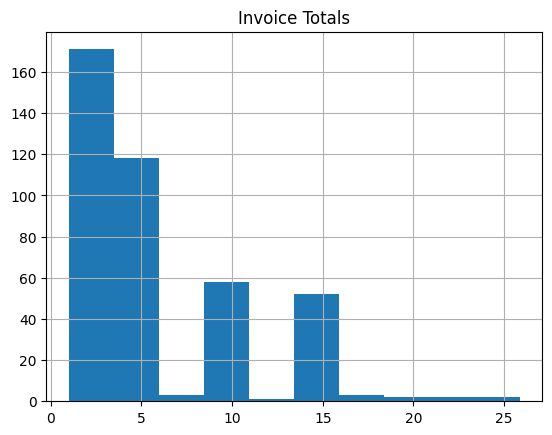

In [30]:
# %%script sqlite3 --column --header chinook.db
query = '''
with
  totals as (
    SELECT Total
    FROM invoices
  ),
  totals_country as (
    SELECT BillingCountry, SUM(Total) as Total
    FROM invoices
    GROUP BY BillingCountry
  )
SELECT *
FROM totals
'''

invoices = pd.read_sql_query( query , db_con)
invoices.hist(column='Total')
plt.title('Invoice Totals')


### Histogram invoice totals by Country

    genreid                Name  Tracks  Playlists  Lineitems  Amount
0         1                Rock     745       1851        835  826.65
1         7               Latin     340        853        386  382.14
2         3               Metal     231        573        264  261.36
3         4  Alternative & Punk     203        525        244  241.56
4         2                Jazz      68        153         80   79.20
5         6               Blues      53        129         61   60.39
6        19            TV Shows      43         86         47   93.53
7        14            R&B/Soul      37         92         41   40.59
8        24           Classical      36        165         41   40.59
9         8              Reggae      28         70         30   29.70
10       21               Drama      27         54         29   57.71
11        9                 Pop      26         52         28   27.72
12       20    Sci Fi & Fantasy      20         40         20   39.80
13       10         

/tmp/ipython-input-1042363801.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center') # ha='center' for vertical alignment


Text(0.5, 1.0, 'Invoice Items By Genre')

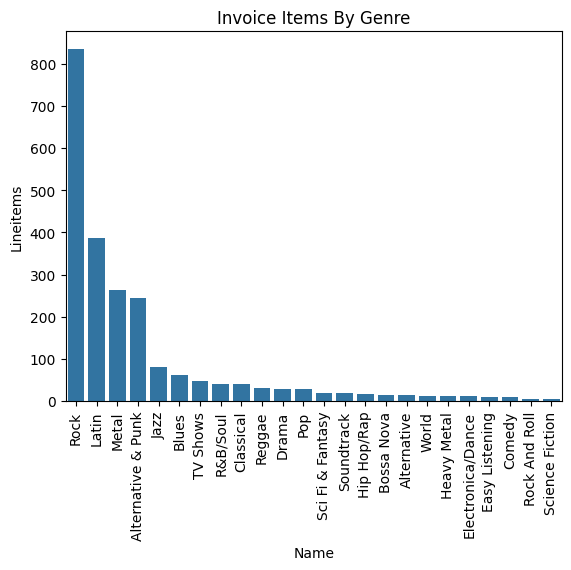

In [31]:
# %%script sqlite3 --column --header chinook.db
query = '''
WITH
  track_playlists as (
    SELECT tracks.trackid, COUNT(playlist_track.playlistid) as PL_Count
    FROM tracks
    JOIN playlist_track
    ON tracks.trackid=playlist_track.trackid
    GROUP BY tracks.trackid
    -- LIMIT 10
  ),

  track_lineitems as (
    SELECT tracks.trackid, tracks.genreid,
           COUNT(invoice_items.invoicelineid) as LI_Count,
           SUM(invoice_items.quantity * invoice_items.unitprice) as LI_Amount
    FROM tracks
    JOIN invoice_items
    ON tracks.trackid=invoice_items.trackid
    GROUP BY tracks.trackid
  ),

  track_info as (
    SELECT track_lineitems.trackid, track_lineitems.genreid,
           track_playlists.PL_Count, track_lineitems.LI_Count, track_lineitems.LI_Amount
    FROM track_lineitems
    JOIN track_playlists
    ON track_lineitems.trackid = track_playlists.trackid
  ),

  genre_info as (
    SELECT track_info.genreid, genres.Name,
           COUNT(track_info.genreid) as Tracks,
           SUM(PL_Count) as Playlists,
           SUM(LI_Count) as Lineitems,
           SUM(LI_Amount) as Amount
    FROM track_info
    JOIN genres ON track_info.genreid=genres.genreid
    GROUP BY track_info.genreid
  )

SELECT * FROM genre_info
ORDER BY Lineitems DESC, Tracks DESC, Playlists DESC
-- LIMIT 5
'''

genres = pd.read_sql_query( query , db_con)

print(genres)

ax = sns.barplot(
    x='Name', y='Lineitems',
    data=genres.sort_values(by='Lineitems', ascending=False)
)
# Rotate the x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center') # ha='center' for vertical alignment
plt.title('Invoice Items By Genre')
#plt.tight_layout()





/tmp/ipython-input-2093450990.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center') # ha='center' for vertical alignment


Text(0.5, 1.0, 'Invoice Totals By Country')

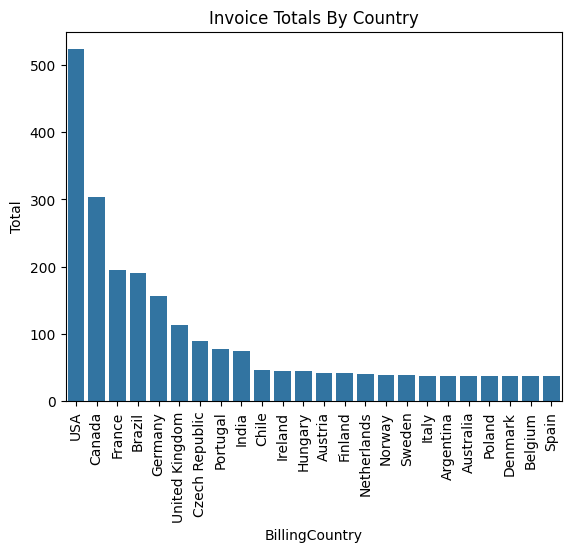

In [32]:
# %%script sqlite3 --column --header chinook.db
query = '''
with
  totals as (
    SELECT Total
    FROM invoices
  ),
  totals_country as (
    SELECT BillingCountry, SUM(Total) as Total
    FROM invoices
    GROUP BY BillingCountry
  )
SELECT *
FROM totals_country
'''
invoices = pd.read_sql_query( query , db_con)

ax = sns.barplot(
    x='BillingCountry', y='Total',
    data=invoices.sort_values(by='Total', ascending=False)
)
# Rotate the x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center') # ha='center' for vertical alignment
plt.title('Invoice Totals By Country')
#plt.tight_layout()


   ID                         Name  Tracks  Playlists  Lineitems   Amount
0   1              MPEG audio file    1745       4324       1976  1956.24
1   2     Protected AAC audio file     129        382        146   144.54
2   3  Protected MPEG-4 video file     103        206        111   220.89
3   4     Purchased AAC audio file       4         16          4     3.96
4   5               AAC audio file       3          7          3     2.97


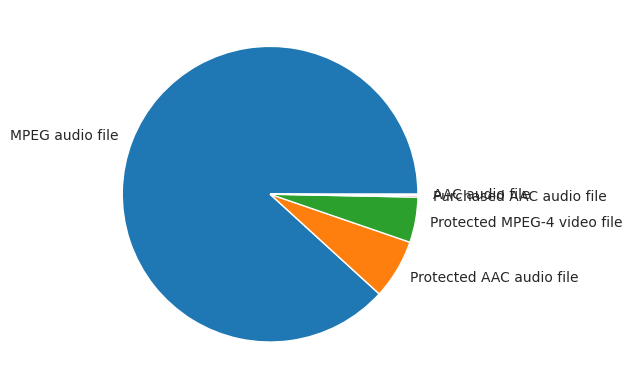

In [33]:
# %%script sqlite3 --column --header chinook.db
query = '''
WITH
  track_playlists as (
    SELECT tracks.trackid, COUNT(playlist_track.playlistid) as PL_Count
    FROM tracks
    JOIN playlist_track
    ON tracks.trackid=playlist_track.trackid
    GROUP BY tracks.trackid
    -- LIMIT 10
  ),

  track_lineitems as (
    SELECT tracks.trackid, tracks.mediatypeid,
           COUNT(invoice_items.invoicelineid) as LI_Count,
           SUM(invoice_items.quantity * invoice_items.unitprice) as LI_Amount
    FROM tracks
    JOIN invoice_items
    ON tracks.trackid=invoice_items.trackid
    GROUP BY tracks.trackid
  ),

  track_info as (
    SELECT track_lineitems.trackid, track_lineitems.mediatypeid,
           track_playlists.PL_Count, track_lineitems.LI_Count, track_lineitems.LI_Amount
    FROM track_lineitems
    JOIN track_playlists
    ON track_lineitems.trackid = track_playlists.trackid
  ),

  media_info as (
    SELECT track_info.mediatypeid as ID, media_types.Name,
           COUNT(track_info.mediatypeid) as Tracks,
           SUM(PL_Count) as Playlists,
           SUM(LI_Count) as Lineitems,
           SUM(LI_Amount) as Amount
    FROM track_info
    JOIN media_types ON track_info.mediatypeid=media_types.mediatypeid
    GROUP BY track_info.mediatypeid
  )

SELECT * FROM media_info
ORDER BY Lineitems DESC, Tracks DESC, Playlists DESC
-- LIMIT 5
'''

medias = pd.read_sql_query( query , db_con)

print(medias)

# ax = sns.barplot(
#     x='Name', y='Lineitems',
#     data=medias.sort_values(by='Lineitems', ascending=False)
# )
# # Rotate the x-axis labels
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center') # ha='center' for vertical alignment
# plt.title('Invoice Items By Media Types')
# #plt.tight_layout()

sns.set_style("whitegrid") # Set style for chart
#plt.figure(figsize=(8,6)) # Set figure size
x = plt.pie(medias["Lineitems"], labels=medias["Name"]) # Create pie chart


## EXTRA CREDIT:
* Use a CTE
* Use a query that joins two or more tables.
* Make a model to see if you can predict something
* Come up with something else cool to do with your data


### Aggregate Artists playlists, tracks and lineitems

,artistid,Artist,genreid,Genre,Tracks,Playlists,Lineitems,Amount
0,158,Battlestar Galactica (Classic),20,Sci Fi & Fantasy,18,36,18,35.82
1,156,The Office,19,TV Shows,14,28,16,31.84
2,17,Chico Buarque,7,Latin,23,56,27,26.73
3,148,Heroes,19,TV Shows,11,22,13,25.87
4,149,Lost,19,TV Shows,13,26,13,25.87
...,...,...,...,...,...,...,...,...
299,58,Deep Purple,1,Rock,1,2,1,0.99
300,114,Ozzy Osbourne,1,Rock,1,2,1,0.99
301,200,The Posies,1,Rock,1,2,1,0.99
302,201,Luciana Souza/Romero Lubambo,7,Latin,1,2,1,0.99


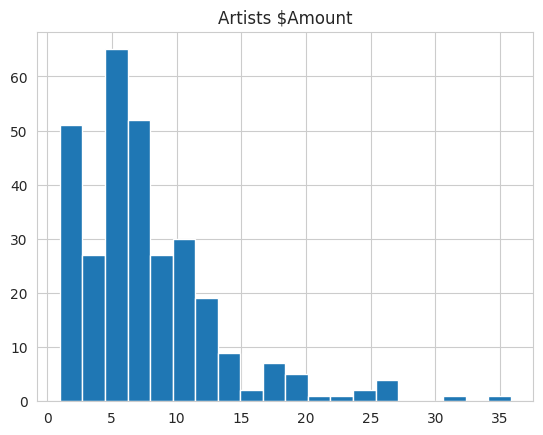

In [34]:
# %%script sqlite3 --column --header chinook.db
query = '''
WITH
  track_playlists as (
    SELECT tracks.trackid, COUNT(playlist_track.playlistid) as PL_Count
    FROM tracks
    JOIN playlist_track
    ON tracks.trackid=playlist_track.trackid
    GROUP BY tracks.trackid
    -- LIMIT 10
  ),

  track_lineitems as (
    SELECT tracks.trackid, tracks.genreid, tracks.albumid,
           COUNT(invoice_items.invoicelineid) as LI_Count,
           SUM(invoice_items.quantity * invoice_items.unitprice) as LI_Amount
    FROM tracks
    JOIN invoice_items
    ON tracks.trackid=invoice_items.trackid
    GROUP BY tracks.trackid
  ),

  track_info as (
    SELECT track_lineitems.trackid, track_lineitems.genreid, track_lineitems.albumid,
           track_playlists.PL_Count, track_lineitems.LI_Count, track_lineitems.LI_Amount
    FROM track_lineitems
    JOIN track_playlists
    ON track_lineitems.trackid = track_playlists.trackid
  ),

  artist_info as (
    SELECT albums.artistid, artists.name as Artist, track_info.genreid, genres.Name as Genre,
           COUNT(track_info.genreid) as Tracks,
           SUM(PL_Count) as Playlists,
           SUM(LI_Count) as Lineitems,
           SUM(LI_Amount) as Amount
    FROM track_info
    JOIN genres ON track_info.genreid=genres.genreid
    JOIN albums ON track_info.albumid=albums.albumid
    JOIN artists ON albums.artistid=artists.artistid
    GROUP BY track_info.albumid
  )

SELECT * FROM artist_info
ORDER BY Amount DESC, Lineitems DESC, Tracks DESC, Playlists DESC
--LIMIT 10

--SELECT genre, SUM(Tracks), SUM(Playlists), SUM(Lineitems), SUM(Amount) as Amount
--FROM artist_info
--GROUP BY genre
--ORDER BY Amount DESC
'''

artists = pd.read_sql_query( query , db_con)

x = artists.hist(column='Amount', bins=20)
x = plt.title('Artists $Amount')

pd.set_option('display.max_colwidth', None)
artists

# ax = sns.barplot(
#     x='Artist', y='Amount',
#     data=artists.sort_values(by='Amount', ascending=False)
# )
# # Rotate the x-axis labels
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center') # ha='center' for vertical alignment
# plt.title('Invoice Items By Artist')
# #plt.tight_layout()

### Model Artists Lineitems/$Total using Playlists and Tracks


In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import statsmodels.api as sm
from sklearn import datasets
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy import special


In [36]:
data = artists[["Tracks", "Playlists", "Lineitems", "Amount"]].copy()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tracks     304 non-null    int64  
 1   Playlists  304 non-null    int64  
 2   Lineitems  304 non-null    int64  
 3   Amount     304 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 9.6 KB


In [37]:
data.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Tracks,304.0,6.526316,4.081589,1.00,4.00,6.00,8.00,25.00
Playlists,304.0,16.233553,10.643087,2.00,9.00,14.00,21.25,69.00
Lineitems,304.0,7.368421,4.728516,1.00,4.00,7.00,10.00,27.00
Amount,304.0,7.659868,5.478834,0.99,3.96,6.93,9.90,35.82


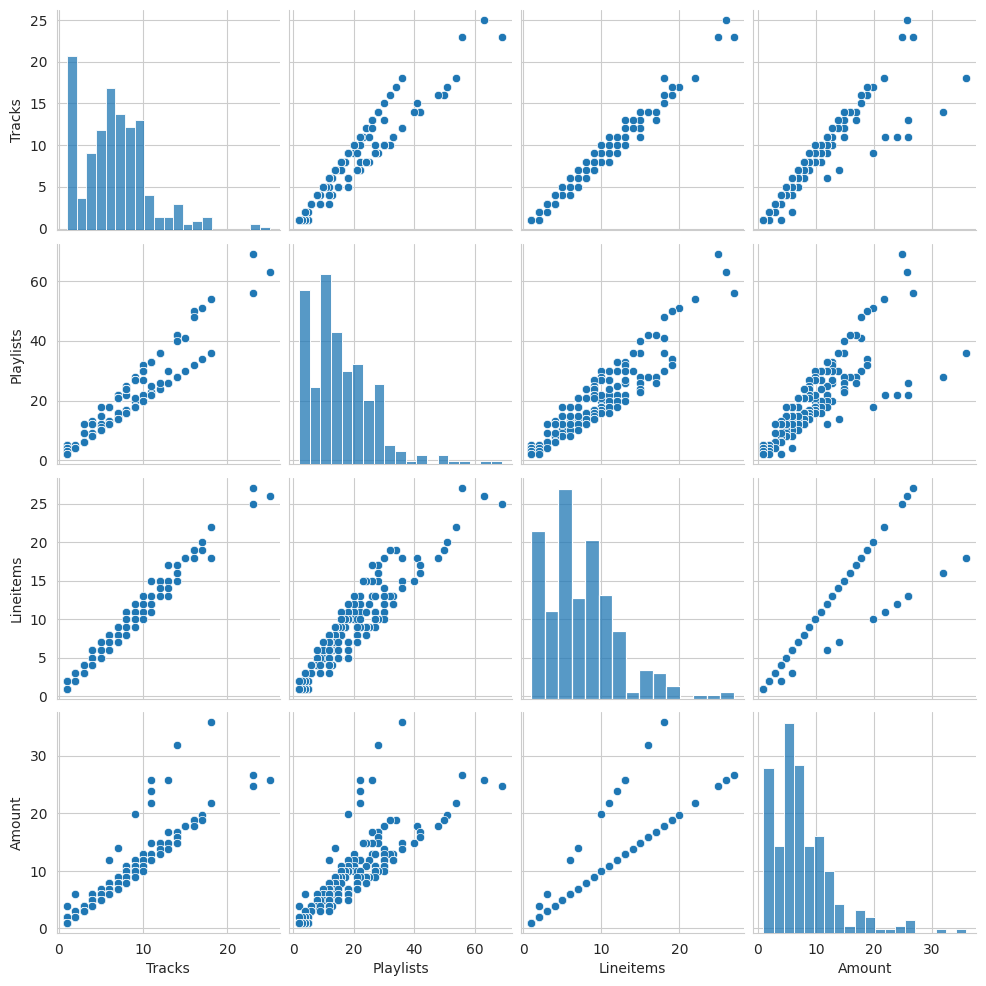

In [38]:
# pairplots
sns.pairplot(data)


In [39]:
def corr_heatmap(df):
  # corr plot
  corr = df.corr()
  sns.set()
  plt.figure(figsize=(10, 7))  # Example: 10 inches wide, 7 inches tall
  sns.heatmap(corr, cmap='RdYlBu',annot = False, vmin = -1, vmax = 1);


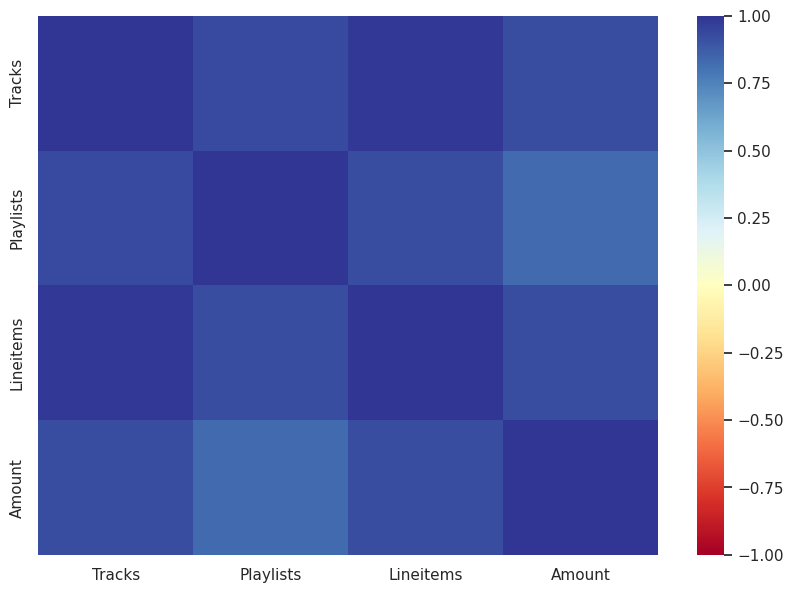

In [40]:
corr_heatmap(data)


### Perform_cv routines

In [67]:
def perform_cv(data,
               n=200,
               test_size=0.25,
               target='Amount'):
  # Perform CV
  # split into Target and Features
  X = data.drop(target, axis = 1)
  y = data[target]
  results = {
      # keep track of sample models
      'rmse': np.zeros(n),
      'rmspe': np.zeros(n),
      'mae': np.zeros(n),
  }
  rmspe_min = 1e6

  for idx in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size)
    model = LinearRegression() # todo: Ridge etc
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results['rmse'][idx] = np.sqrt(mean_squared_error(y_test,y_pred))
    results['rmspe'][idx] = (((y_test - y_pred) / y_test) **2).mean()**(1/2) * 100
    results['mae'][idx] = metrics.mean_absolute_error(y_test, y_pred)
    if results['rmspe'][idx] < rmspe_min:
      # keep track of model with min rmspe
      rmspe_min = results['rmspe'][idx]
      results['model'] = model
      results['model_idx'] = idx
      results['y_test'] = y_test
      results['y_pred'] = y_pred

  return results


In [71]:
def perform_cv_info(results, target='Amount'):
  '''
  Print summary info on perform_cv results
  '''
  # print summary stats
  df = pd.DataFrame({k: v for k, v in results.items() if k in ["rmspe", "rmse", "mae"]})
  pd.set_option('display.width', 100)
  #pd.set_option('display.max_columns', None)
  print(df.describe().transpose().round(2))

  # and just for model with min rmpse
  idx = results['model_idx']
  print("\nFor model with min RMPSE:")
  print(f"CV RMSPE: {results['rmspe'][idx].round(2)}")
  print(f"CV RMSE: {results['rmse'][idx].round(2)}")
  print(f"CV MAE: {results['mae'][idx].round(2)}")
  #print(f"Number of Predictors: {len(X.columns)}")


In [72]:
def perform_cv_plots(results, target='Amount'):
  '''
  Plots summary info on perform_cv results
  '''
  # plots for model with min rmpse
  y_test = results['y_test']
  y_pred = results['y_pred']

  plt.figure(figsize = (10,6))
  plt.scatter(y_test, y_pred)
  plt.plot([min(y_pred), max(y_pred)],[min(y_pred), max(y_pred)], c='red')
  plt.xlabel(f'Actual {target}')
  plt.ylabel(f'Predicted {target}')

  # QQ Plot - are Residuals normally distributed
  res = y_test - y_pred
  plt.figure(figsize = (10,6))
  sm.qqplot(res, fit=True, line="45")

  # Residuals vs Fitted (Predicted) Values - Constant variance
  plt.figure(figsize = (10,6))
  plt.scatter(y_pred, res)
  plt.xlabel("Fitted")
  plt.ylabel("Residuals")
  plt.hlines(0, min(y_pred), max(y_pred), colors = 'red', linestyles = 'dashed')

  # Residuals vs Time - indepedence
  plt.figure(figsize = (10,6))
  plt.scatter(range(len(res)), res)
  plt.plot(range(len(res)), res, 'b')
  plt.xlabel("Time")
  plt.ylabel("Residuals")
  plt.hlines(0, min(range(len(res))), max(range(len(res))), colors = 'red', linestyles = 'dashed')


### Model results

In [73]:
# %%capture --no-stdout
data = artists[["Tracks", "Playlists", "Amount"]].copy()
#data = artists[["Tracks", "Playlists", "Lineitems", "Amount"]].copy()
results = perform_cv(data, n=200, test_size=0.25, target='Amount')


In [74]:
perform_cv_info(results, 'Amount')


       count   mean   std    min    25%    50%    75%    max
rmse   200.0   1.98  0.48   0.86   1.69   1.95   2.29   3.32
rmspe  200.0  25.16  4.79  15.70  21.65  24.60  28.00  41.01
mae    200.0   1.07  0.13   0.66   0.98   1.07   1.17   1.52

For model with min RMPSE:
CV RMSPE: 15.7
CV RMSE: 2.92
CV MAE: 1.25


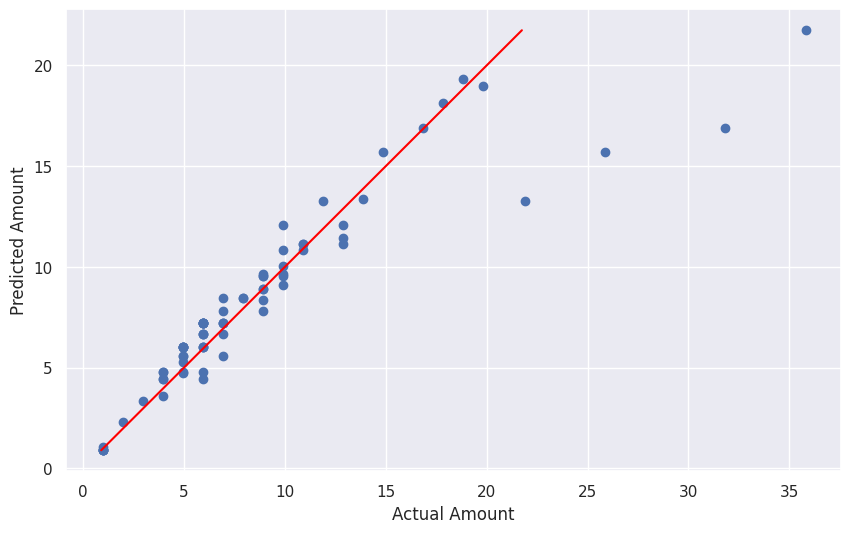

<Figure size 1000x600 with 0 Axes>

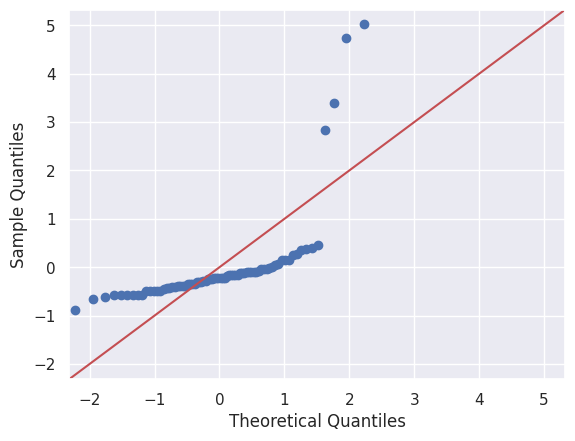

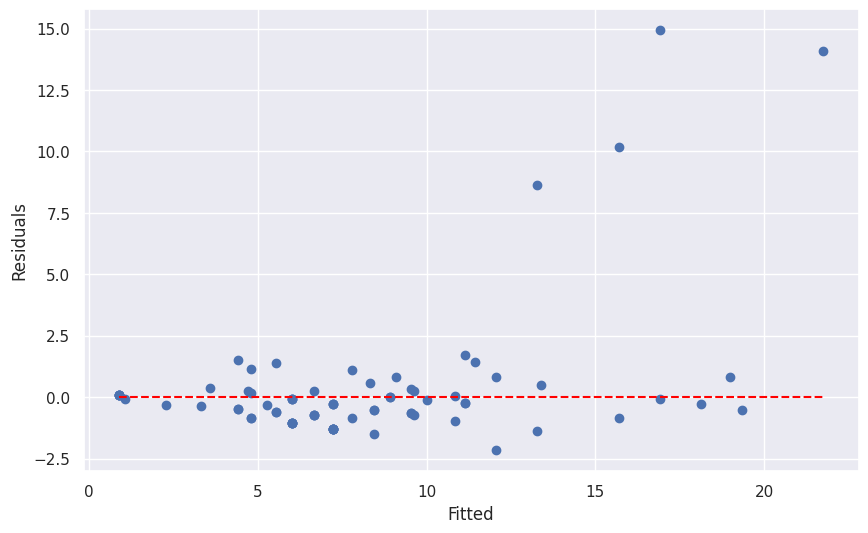

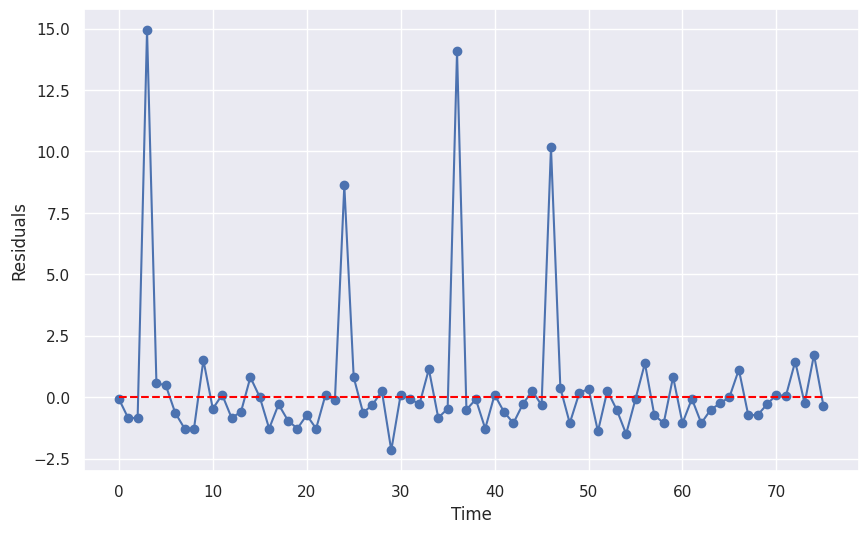

In [75]:
perform_cv_plots(results, 'Amount')
